In [2]:
import pandas as pd

dataFrame = pd.read_csv('kc_house_data.csv')
print('Quantidade de linhas do Data Frame: ', len(dataFrame))
print('Quantidade de colunas do Data Frame: ', len(dataFrame.columns))



Quantidade de linhas do Data Frame:  21613
Quantidade de colunas do Data Frame:  21


We're going to study Data Science and linear regression using data from housing prices and data in Seattle. It contains a lot of variables.

The code above this comment is used to check and see how many lines and columns are written in the .csv file

In [6]:
dataFrame['view'].value_counts()


0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Now, we're going to see which types of data are used in the file:  

In [7]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The code returned every single data type of the .csv archive. It means that the 21 columns are used for these data.

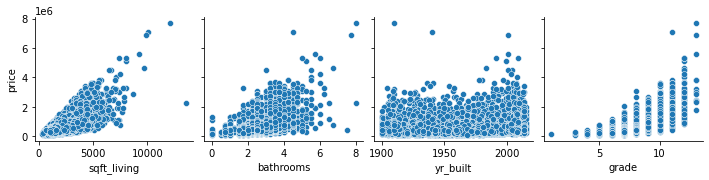

In [9]:
import seaborn as sb

sb.pairplot(dataFrame, x_vars=["sqft_living", "bathrooms", "yr_built", "grade"], y_vars=["price"])

Now that we've done a good analysis of the data, using the price as the y parameter of the chart, let's select an attribute to create a simple linear regression. The charts above shows that the best attribute to do it it is the sqft_living. Let's use it. 

In [20]:
y = dataFrame[["price"]] #variable that depends, the one that we want to predict
x = dataFrame[["sqft_living"]]

We're worried about overfitting, so we're going to split the data into 2 categories. The first one it is going to be just for testing, the other one is for training. 

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)
print('Registers for just training: ', len(x_train))
print('Register for only testing: ', len(x_test))

Registers for just training:  18371
Register for only testing:  3242


Now, let's do it:

In [22]:
from sklearn.linear_model import LinearRegression

objRL = LinearRegression()

Now we have a variable that's capable of doing linear regresssions(objRL). Let's use x_train and y_train

In [23]:
objRL.fit(x_train, y_train)

LinearRegression()

We just added two variables to objRL. To plot a chart, we need to create a variable for the prediction. Let's call it y_pred:

In [24]:
y_pred = objRL.predict(x_train)
y_pred

array([[ 426143.60927217],
       [ 401298.82503511],
       [ 453748.92509112],
       ...,
       [1083150.12576319],
       [ 492396.36723765],
       [ 658028.26215135]])

Once the object made the prediction, it's now ready to plot a new chart. Let's see how it is:

C:\Users\Antonio\AppData\Local\Temp/ipykernel_15396/595716271.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x_train, y_pred, color="red", lineWidth="3")


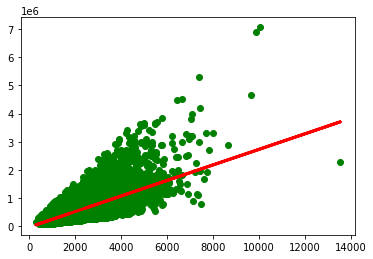

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, y_pred, color="red", lineWidth="3")
plt.show()

The model was successfully trained and it is ready to be used. But we need to ask ourselves: it is good enough? 
If we don't know, we got to see how accurate the model is. To do it, we're going to use two parameters, one of them it is MSE (mean square error) and the other one it is the R2. The data scientist have to search a trained model which MSE is the closest possible to 0 and the R2 close enough to 1. Data Scientists agree that good models are the ones that their R2 is above 0.7.

In [31]:
y_pred_test = objRL.predict(x_test)
y_pred_test

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("R2: ", r2_score(y_test, y_pred_test))

MSE:  78389332133.04573
R2:  0.5027547846490501


As we can see, the R2 is not good enough. It is caused by the amount of informations that are avaliable. Let's create an array with values that we want.

In [32]:
data = [
          [1180], 
          [770], 
          [312]
]

objRL.predict(data)

array([[290877.56175931],
       [177695.76690161],
       [ 51263.42045081]])

We've learned how to generate a simple linear regression, which used only one independent variable (sqrFt), to predict its pricing. Now, let's improve it using 4 independent variables to predict the price. In this case, we're going to use:

sqft_living, 
bedrooms, 
bathrooms, 
grade

In [34]:
#lets populate the variable that will store the independent variables values

x2 = dataFrame[["sqft_living", "bedrooms", "bathrooms", "grade"]]

#lets populate the dependent one 

y2 = dataFrame[["price"]]

Once we selected the four independent variables, let's again try to avoid overfitting. Notice that we're doing the entire proccess once again. 

In [35]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.10)
print("Amount of data used only for training: ", len(x2_train))
print("Amount of data used only for testing: ", len(x2_test))

Amount of data used only for training:  19451
Amount of data used only for testing:  2162


Let's generate a new model with those data (and other linear regression)

In [43]:

objRL2 = LinearRegression()
objRL2.fit(x2_train, y2_train)

LinearRegression()

Now that we created once again a new object to store this entire information, we need to see its accuracy:

In [44]:
y2_pred_test = objRL2.predict(x2_test)

print("MSE: ", mean_squared_error(y2_test, y2_pred_test))
print("R2: ", r2_score(y2_test, y2_pred_test))

MSE:  57297369586.7325
R2:  0.5291173819413049
